# Patterned DBS Pilot

In [1]:
import plotly
import plotly.graph_objs as go

# Importing Python and external packages


import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from PyQt5 import QtWidgets # for GUI interactive plots

import scipy
from scipy import stats
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz

import seaborn as sns
import pingouin as pg
from itertools import combinations
from statannotations.Annotator import Annotator

import openpyxl
from openpyxl import Workbook, load_workbook
# import xlrd
import pickle
import json
import csv
import h5py
import fooof
from fooof.plts.spectra import plot_spectrum

#mne
from pathlib import Path
import mne_bids
from mne_bids import (
    BIDSPath,
    inspect_dataset,
    mark_channels)
import mne
from mne.time_frequency import tfr_morlet 



In [16]:
jennifer_user_path = os.getcwd()
while jennifer_user_path[-14:] != 'jenniferbehnke':
    jennifer_user_path = os.path.dirname(jennifer_user_path)

# directory to this Repository
project_path = os.path.join(jennifer_user_path, 'code', 'Patterned_stimulation_project', 'patterned_DBS')
sys.path.append(project_path)

os.chdir(project_path)

import src.patterned.utils.find_folders as find_folders
importlib.reload(find_folders)

# import PyPerceive

project_path = find_folders.chdir_repository("Py_Perceive")

from PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)

import PerceiveImport.methods.load_rawfile as load_rawfile
import PerceiveImport.methods.find_folders as PyPerceive_find_folders
import PerceiveImport.methods.metadata_helpers as metaHelpers



# import all functions from BetaSenSightLongterm
project_path = find_folders.chdir_repository("patterned_DBS")

# patterned DBS
import src.patterned.beta_suppression_latency.patterned_dbs_pilot as pilot
import src.patterned.beta_suppression_latency.patterned_find_dbs_OFF_moment as find_dbs_OFF_moment

# utility functions
import src.patterned.utils.io as io
import src.patterned.utils.find_folders as find_folders
import src.patterned.utils.lfp_preprocessing as lfp_preprocessing

importlib.reload(pilot)
importlib.reload(find_dbs_OFF_moment)
importlib.reload(io)
importlib.reload(find_folders)
importlib.reload(lfp_preprocessing)


<module 'src.patterned.utils.lfp_preprocessing' from '/Users/jenniferbehnke/code/Patterned_stimulation_project/patterned_DBS/src/patterned/utils/lfp_preprocessing.py'>

In [3]:
# load if you want to see complete Dataframes
pd.set_option("display.max_rows", None)

In [20]:
%matplotlib qt5 

## Load the time domain streamings of sub 075 3MFU 

Load the source JSON

In [3]:
source_json = io.load_source_json_patterned_dbs(sub="075", incl_session=["fu3m"], run="2")

add run 1
add run 2


In [4]:
source_json["BrainSenseTimeDomain"][0].keys()

dict_keys(['Pass', 'GlobalSequences', 'GlobalPacketSizes', 'TicksInMses', 'Channel', 'Gain', 'FirstPacketDateTime', 'SampleRateInHz', 'TimeDomainData'])

Write the pickle files

In [5]:
all_streamings = pilot.write_json_streaming_info(sub="075", incl_session=["fu3m"], run="2")

add run 1
add run 2
Creating RawArray with float64 data, n_channels=1, n_times=30437
    Range : 0 ... 30436 =      0.000 ...   121.744 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=30437
    Range : 0 ... 30436 =      0.000 ...   121.744 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=76687
    Range : 0 ... 76686 =      0.000 ...   306.744 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=76687
    Range : 0 ... 76686 =      0.000 ...   306.744 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=30875
    Range : 0 ... 30874 =      0.000 ...   123.496 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=30875
    Range : 0 ... 30874 =      0.000 ...   123.496 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=77125
    Range : 0 ... 77124 =      0.000 ...   308.496 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=77125
    Range : 0 ... 7

In [6]:
all_streamings

{'streaming_info':    streaming_index                          original_time_domain_data  \
 0                0  [14.1180201302, 9.6776750892, 0.3415650031, -1...   
 1                1  [-9.0673712548, -5.7804491749, 0.7933949848, -...   
 2                2  [-11.2716451039, -8.1975600756, 1.2524050115, ...   
 3                3  [-2.153500673, -2.6068692357, 4.4203434867, 6....   
 4                4  [-17.7613801638, -20.9493201931, -16.167410149...   
 5                5  [-4.0803170646, -7.5939234259, -8.7273448327, ...   
 6                6  [3.4156500315, -0.6831300063, -8.7668350808, -...   
 7                7  [-2.0401585323, 1.5867899696, 5.3270806122, 2....   
 8                8  [8.9945450829, 20.60775519, 28.3498952614, 36....   
 9                9  [-11.6742404905, -9.6340819582, -4.9870541901,...   
 10              10  [2.8463750262, 2.390955022, -1.1385500105, -5....   
 11              11  [0.9067371255, 3.7402906426, 4.1936592053, 4.9...   
 12              12 

In [7]:
data = io.load_pickle_files(filename="streaming_info_patterned_pilot_sub-075")
data

,streaming_index,original_time_domain_data,channel,time_domain_dataframe,rec_duration,pre_or_post,burstDBS_or_cDBS,DBS_duration,hemisphere
0,0,"[14.1180201302, 9.6776750892, 0.3415650031, -1...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,121.744,pre,burstDBS,1min,Left
1,1,"[-9.0673712548, -5.7804491749, 0.7933949848, -...",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,121.744,pre,burstDBS,1min,Right
2,2,"[-11.2716451039, -8.1975600756, 1.2524050115, ...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,306.744,post,burstDBS,1min,Left
3,3,"[-2.153500673, -2.6068692357, 4.4203434867, 6....",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,306.744,post,burstDBS,1min,Right
4,4,"[-17.7613801638, -20.9493201931, -16.167410149...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,123.496,pre,cDBS,1min,Left
5,5,"[-4.0803170646, -7.5939234259, -8.7273448327, ...",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,123.496,pre,cDBS,1min,Right
6,6,"[3.4156500315, -0.6831300063, -8.7668350808, -...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,308.496,post,cDBS,1min,Left
7,7,"[-2.0401585323, 1.5867899696, 5.3270806122, 2....",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,308.496,post,cDBS,1min,Right
8,8,"[8.9945450829, 20.60775519, 28.3498952614, 36....",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,123.996,pre,burstDBS,5min,Left
9,9,"[-11.6742404905, -9.6340819582, -4.9870541901,...",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,123.996,pre,burstDBS,5min,Right


In [8]:
raw_objects = io.load_pickle_files(filename="raw_objects_patterned_pilot_sub-075")
raw_objects

{'0': <RawArray | 1 x 30437 (121.7 s), ~244 kB, data loaded>,
 '1': <RawArray | 1 x 30437 (121.7 s), ~244 kB, data loaded>,
 '2': <RawArray | 1 x 76687 (306.7 s), ~605 kB, data loaded>,
 '3': <RawArray | 1 x 76687 (306.7 s), ~605 kB, data loaded>,
 '4': <RawArray | 1 x 30875 (123.5 s), ~247 kB, data loaded>,
 '5': <RawArray | 1 x 30875 (123.5 s), ~247 kB, data loaded>,
 '6': <RawArray | 1 x 77125 (308.5 s), ~608 kB, data loaded>,
 '7': <RawArray | 1 x 77125 (308.5 s), ~608 kB, data loaded>,
 '8': <RawArray | 1 x 31000 (124.0 s), ~248 kB, data loaded>,
 '9': <RawArray | 1 x 31000 (124.0 s), ~248 kB, data loaded>,
 '10': <RawArray | 1 x 146500 (586.0 s), ~1.1 MB, data loaded>,
 '11': <RawArray | 1 x 146500 (586.0 s), ~1.1 MB, data loaded>,
 '12': <RawArray | 1 x 30875 (123.5 s), ~247 kB, data loaded>,
 '13': <RawArray | 1 x 30875 (123.5 s), ~247 kB, data loaded>,
 '16': <RawArray | 1 x 145063 (580.2 s), ~1.1 MB, data loaded>,
 '17': <RawArray | 1 x 145063 (580.2 s), ~1.1 MB, data loaded>

## Start from beginning: Load the JSON file with PyPerceive

In [116]:
mainclass_sub = main_class.PerceiveData(
    sub = "075", 
    incl_modalities= ["streaming"],
    incl_session = ["fu3m"],
    incl_condition = ["m0s1"],
    incl_task = ["rest"],
    import_json = True,
    # warn_for_metaNaNs = True,
    # allow_NaNs_in_metadata = True,
)

add run 1
add run 2


In [117]:
sub075_JSON = mainclass_sub.streaming.fu3m.m0s1.rest.run2.json

In [115]:
recordings_dict = {
    "0": ["pre", "burstDBS", "1min" "Left"],
    "1": ["pre", "burstDBS", "1min" "Right"],
    "2": ["post", "burstDBS", "1min" "Left"],
    "3": ["post", "burstDBS", "1min" "Right"],
    "4": ["pre", "cDBS", "1min", "Left"],
    "5": ["pre", "cDBS", "1min", "Right"],
    "6": ["post", "cDBS", "1min", "Left"],
    "7": ["post", "cDBS", "1min", "Right"],
    "8": ["pre", "burstDBS", "5min" "Left"],
    "9": ["pre", "burstDBS", "5min" "Right"],
    "10": ["post", "burstDBS", "5min" "Left"],
    "11": ["post", "burstDBS", "5min" "Right"],
    "12": ["pre", "cDBS", "5min" "Left"],
    "13": ["pre", "cDBS", "5min" "Right"],
    "16": ["post", "cDBS", "5min" "Left"],
    "17": ["post", "cDBS", "5min" "Right"],
    "18": ["pre", "burstDBS", "30min" "Left"],
    "19": ["pre", "burstDBS", "30min" "Right"],
    "22": ["post", "burstDBS", "5min" "Left"], # 8.45 min
    "23": ["post", "burstDBS", "5min" "Right"], # 8.45 min
}

# 14,15 only 3 seconds
# 20, 21 only 20 seconds

list(recordings_dict.keys())

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '16',
 '17',
 '18',
 '19',
 '22',
 '23']

In [131]:
index_streaming = 6


# BrainSenseTimeDomain length: 24
# BrainSenseTimeDomain[0] keys: "TimeDomainData", "Channel", "Gain"

TimeDomainData = sub075_JSON["BrainSenseTimeDomain"][index_streaming]["TimeDomainData"]
channel = sub075_JSON["BrainSenseTimeDomain"][index_streaming]["Channel"] # first 'ZERO_TWO_LEFT', then 'ZERO_TWO_RIGHT'

units = ["µVolt"]
scale = np.array([1e-6 if u == "µVolt" else 1 for u in units])

info = mne.create_info(ch_names=[channel], sfreq=250, ch_types="dbs")
raw = mne.io.RawArray(TimeDomainData * np.expand_dims(scale, axis=1), info)

print(f"duration: {raw.tmax} sec, channel_ {channel}")

Creating RawArray with float64 data, n_channels=1, n_times=77125
    Range : 0 ... 77124 =      0.000 ...   308.496 secs
Ready.
duration: 308.496 sec, channel_ ZERO_TWO_LEFT


In [132]:
raw.ch_names

['ZERO_TWO_LEFT']

In [133]:
dataframe = raw.to_data_frame()
dataframe.head()

,time,ZERO_TWO_LEFT
0,0.000,3.415650
1,0.004,-0.683130
2,0.008,-8.766835
3,0.012,-8.880690
4,0.016,-0.796985


In [61]:
raw.tmax # duration of recording in seconds

121.744

In [58]:
dataframe.loc[(raw.n_times)-1, "time"]

121.744

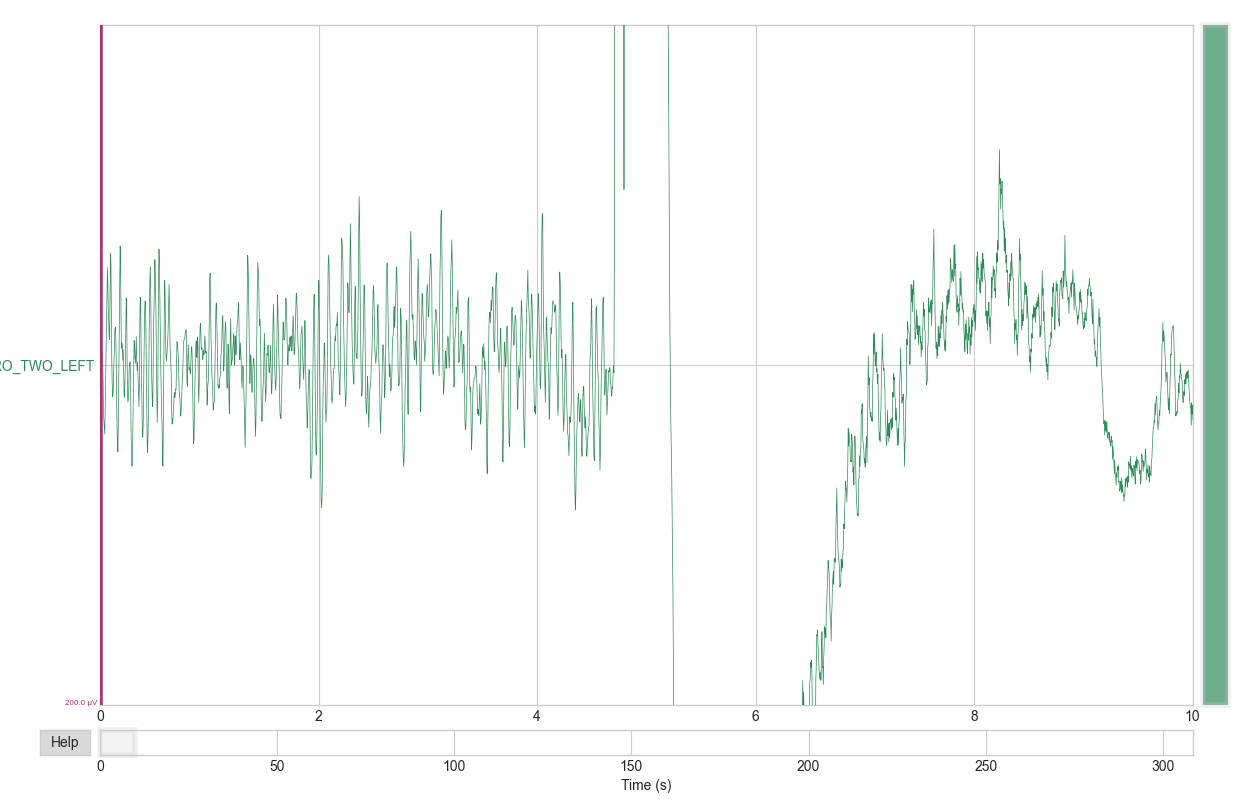

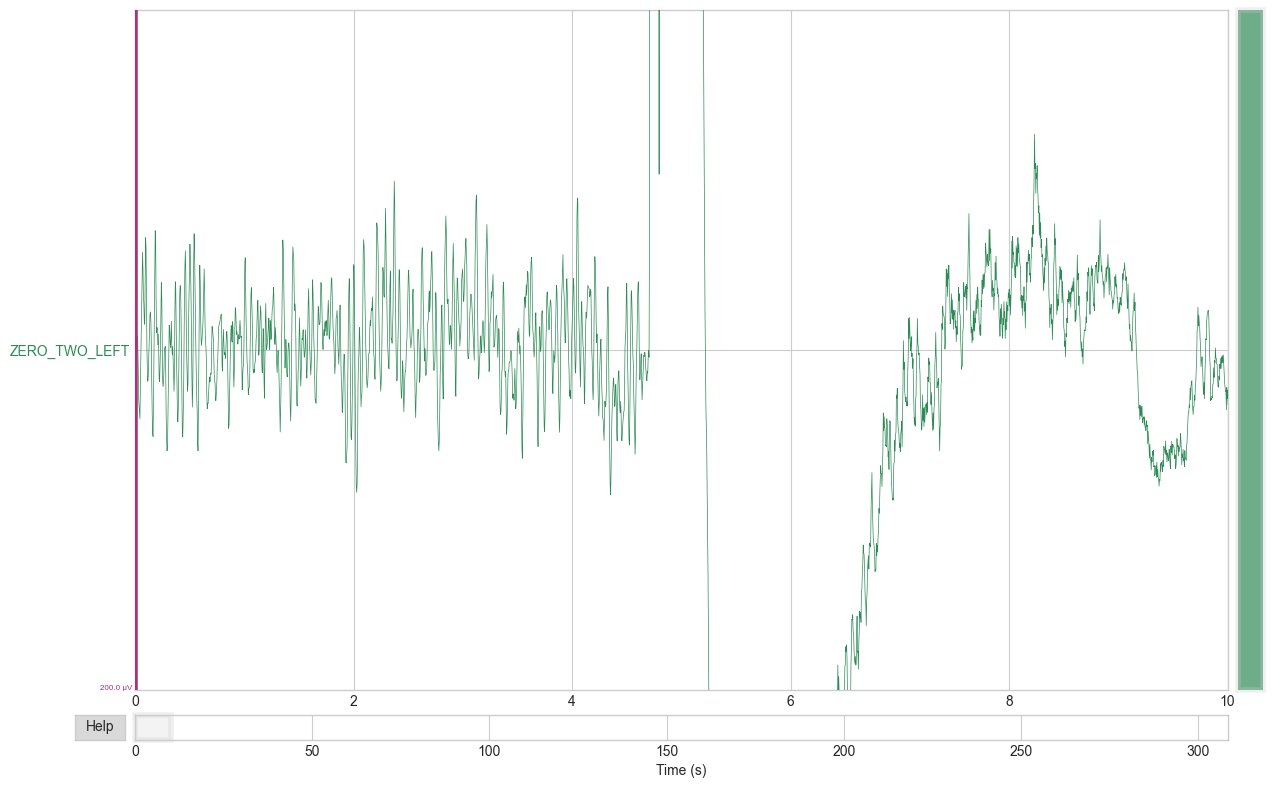

In [134]:
raw.plot()

## Plot Time Frequency Plot of Patterned DBS Pilot (sub075)

Figures time_frequency_plot_sub-075_Right_3MFU_pilot_1min.svg and time_frequency_plot_sub-075_Right_3MFU_pilot_1min.png 
were written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/figures.
Figures time_frequency_plot_sub-075_Left_3MFU_pilot_1min.svg and time_frequency_plot_sub-075_Left_3MFU_pilot_1min.png 
were written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/figures.


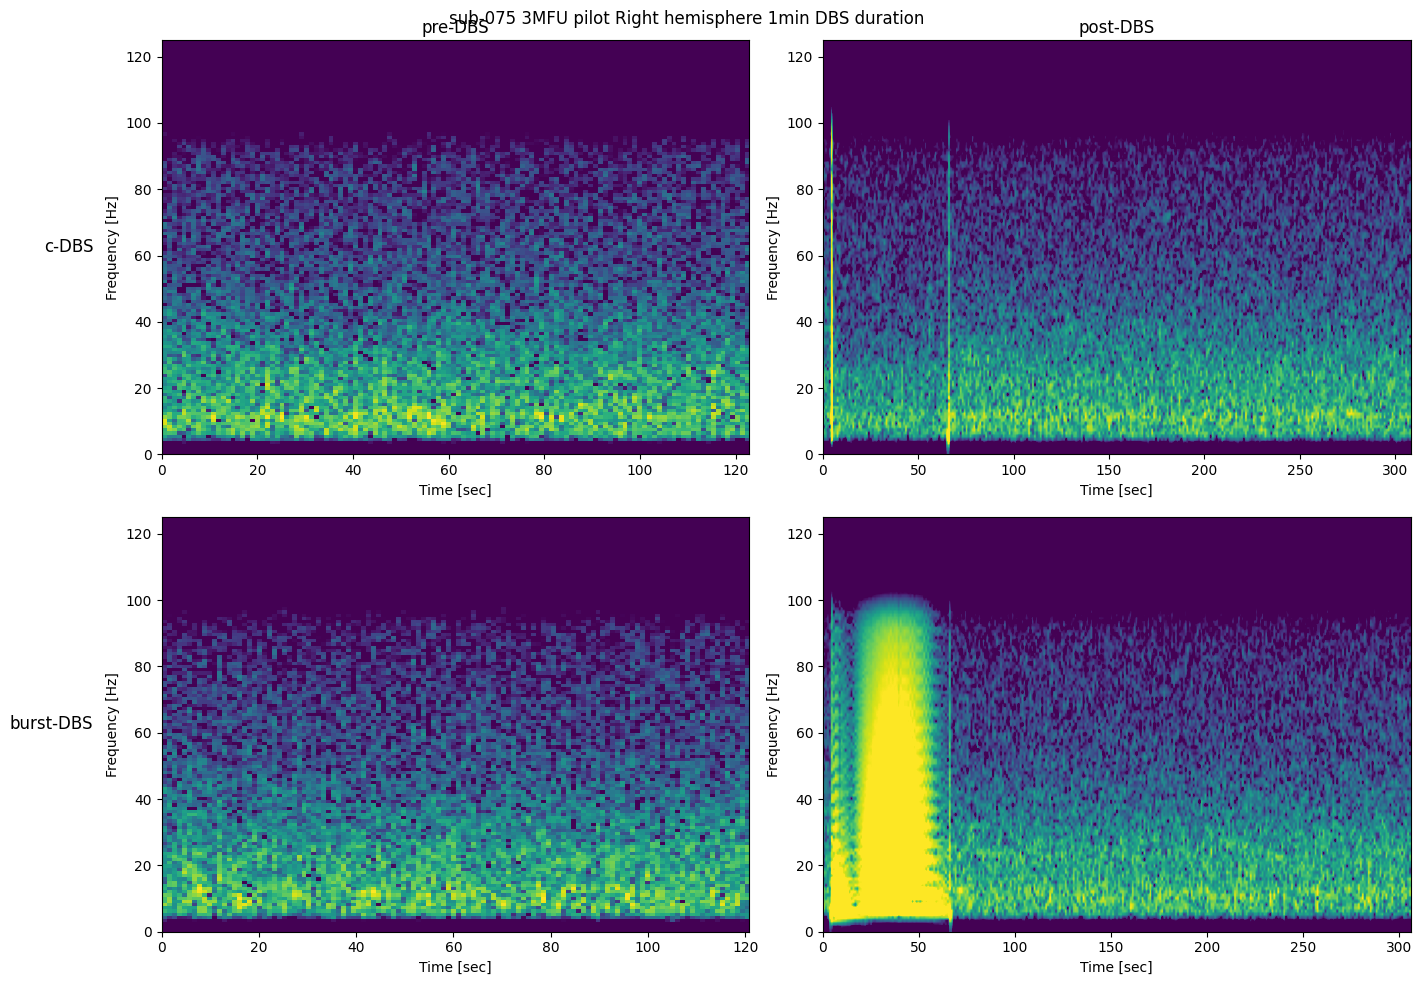

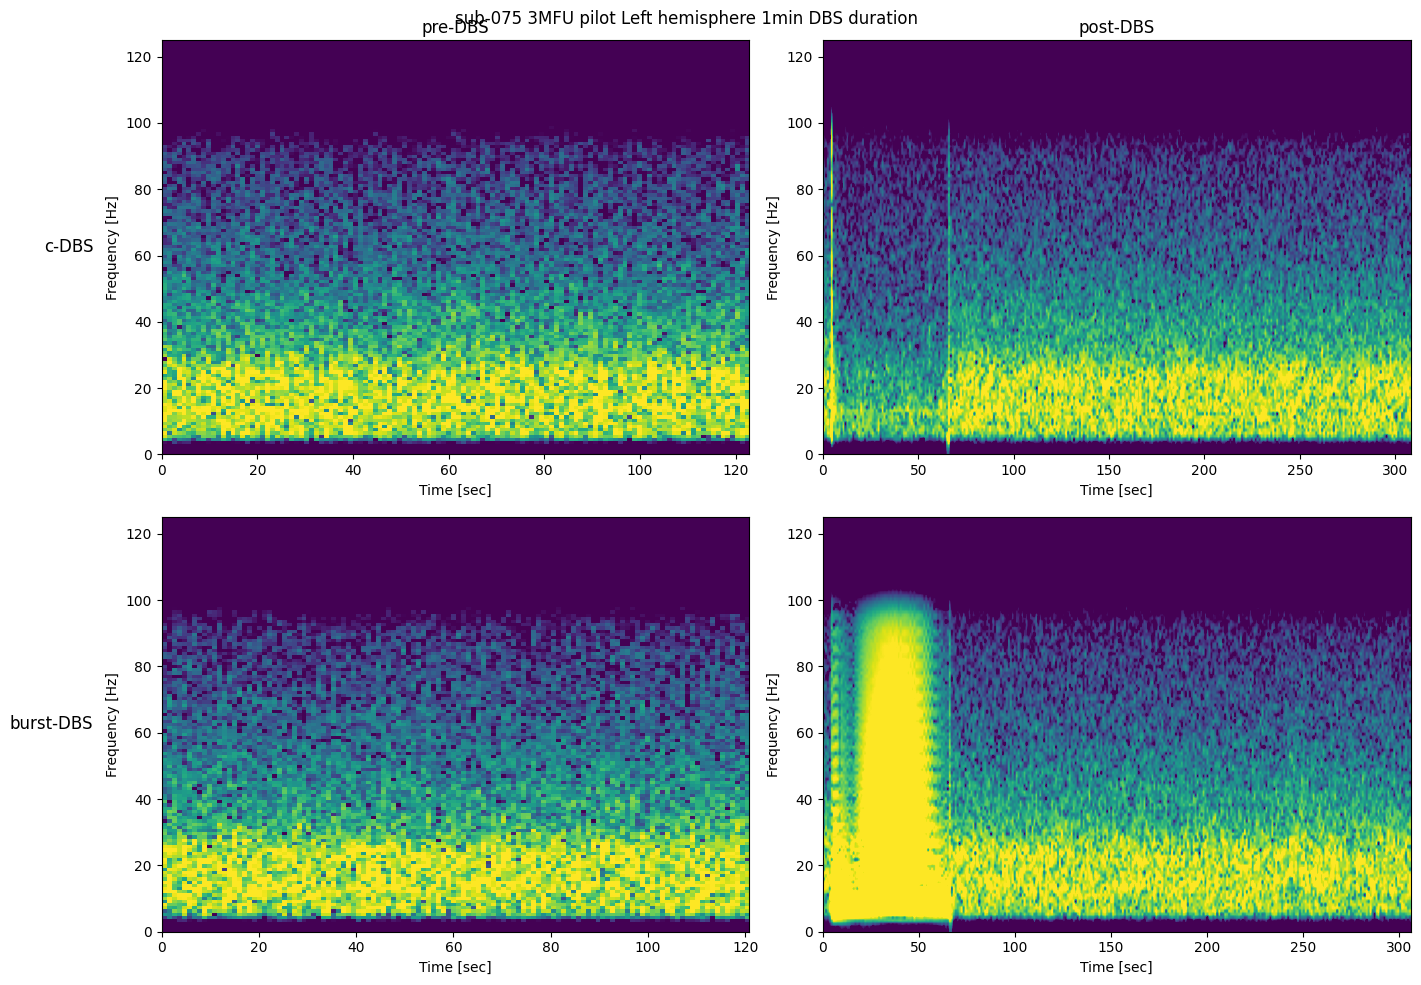

In [9]:
time_frequency = pilot.plot_time_frequency(dbs_duration="1min")

In [10]:
data = io.load_pickle_files(filename="streaming_info_patterned_pilot_sub-075")
pre_burstDBS_1min = data.original_time_domain_data.values[0]



In [11]:
data

,streaming_index,original_time_domain_data,channel,time_domain_dataframe,rec_duration,pre_or_post,burstDBS_or_cDBS,DBS_duration,hemisphere
0,0,"[14.1180201302, 9.6776750892, 0.3415650031, -1...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,121.744,pre,burstDBS,1min,Left
1,1,"[-9.0673712548, -5.7804491749, 0.7933949848, -...",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,121.744,pre,burstDBS,1min,Right
2,2,"[-11.2716451039, -8.1975600756, 1.2524050115, ...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,306.744,post,burstDBS,1min,Left
3,3,"[-2.153500673, -2.6068692357, 4.4203434867, 6....",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,306.744,post,burstDBS,1min,Right
4,4,"[-17.7613801638, -20.9493201931, -16.167410149...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,123.496,pre,cDBS,1min,Left
5,5,"[-4.0803170646, -7.5939234259, -8.7273448327, ...",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,123.496,pre,cDBS,1min,Right
6,6,"[3.4156500315, -0.6831300063, -8.7668350808, -...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,308.496,post,cDBS,1min,Left
7,7,"[-2.0401585323, 1.5867899696, 5.3270806122, 2....",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,308.496,post,cDBS,1min,Right
8,8,"[8.9945450829, 20.60775519, 28.3498952614, 36....",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,123.996,pre,burstDBS,5min,Left
9,9,"[-11.6742404905, -9.6340819582, -4.9870541901,...",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,123.996,pre,burstDBS,5min,Right


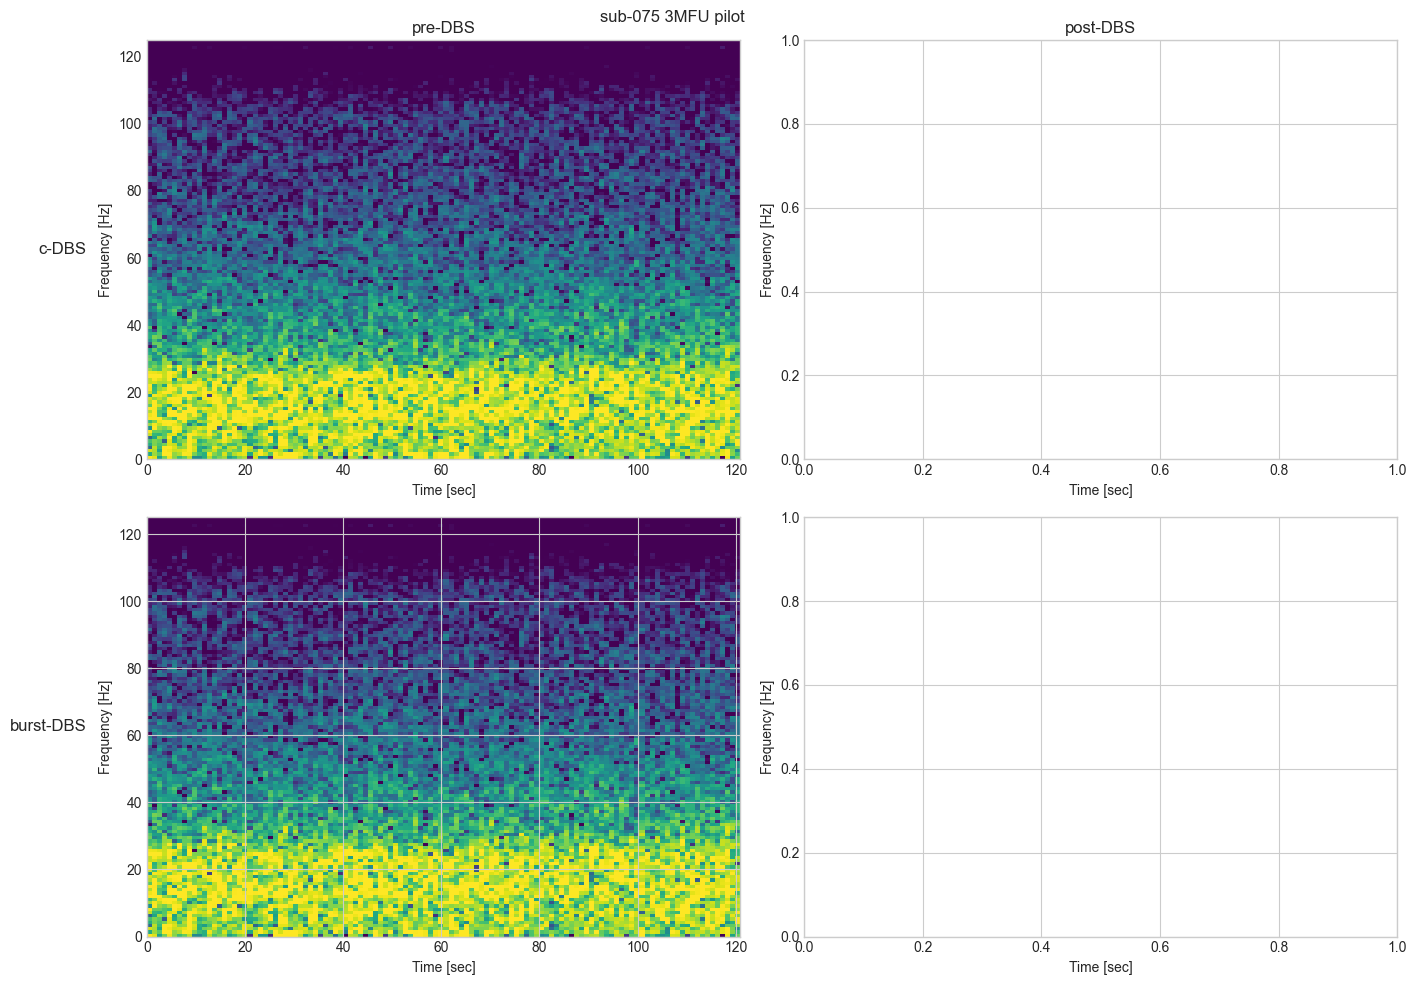

In [213]:
# Figure Layout
# set layout for figures: using the object-oriented interface

cols = ["pre-DBS", "post-DBS"]
rows = ["c-DBS", "burst-DBS"]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.setp(axes.flat, xlabel='Time [sec]', ylabel='Frequency [Hz]')

pad = 5 # in points

for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.tight_layout()
# tight_layout doesn't take these labels into account. We'll need 
# to make some room. These numbers are are manually tweaked. 
# You could automatically calculate them, but it's a pain.
fig.subplots_adjust(left=0.15, top=0.95)
fig.suptitle(f"sub-075 3MFU pilot")


# filter band-pass 5-95 Hz


# plot TF 

fs =250
noverlap = 0

axes[0, 0].specgram(x = pre_burstDBS_1min, Fs = fs, noverlap = noverlap, cmap = 'viridis', vmin = -25, vmax = 10)
axes[1, 0].specgram(x = version_dataframe, Fs = fs, noverlap = noverlap, cmap = 'viridis', vmin = -25, vmax = 10)

axes[0, 0].grid(False)                
                

## Plot Power Spectra

### Beta Baseline

In [12]:
beta_baseline_data = pilot.calculate_beta_baseline(
    DBS_duration="5min",
    burstDBS_or_cDBS="cDBS",
    hemisphere="Left",
    filtered="unfiltered",
    pre_or_post="post",

)

Excel file loaded:  streaming_dbs_turned_OFF.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data


In [78]:
beta_freq_data = beta_baseline_data[beta_baseline_data["freq_band"] == "beta"]
beta_freq_data

,hemisphere,DBS_duration,burstDBS_or_cDBS,filtered,freq_band,frequencies,times,Zxx,average_Zxx,std_Zxx,sem_Zxx,normalized_to_5_95,normalized_to_40_90,f_average_rel_to_5_95,f_average_rel_to_40_90,f_average_raw
0,Left,5min,cDBS,unfiltered,beta,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, ...","[[0.7034893453043981, 4.170372894334033, 2.683...","[1.4058247601519953, 5.912845100212812, 4.9367...","[2.435541667865355, 7.527449101564216, 6.53984...","[0.22326573863817542, 0.6900401277860277, 0.59...","[0.008588271955614266, 0.03612194292733794, 0....","[0.27346821331417565, 1.1501968317757123, 0.96...",0.028381,0.903698,4.645664


In [79]:
frequencies = beta_freq_data.frequencies.values[0]
average_power = beta_freq_data.average_Zxx.values[0]

plt.plot(frequencies, average_power)

: 

## Find the moment DBS is turned OFF

Using matplotlib as 2D backend.


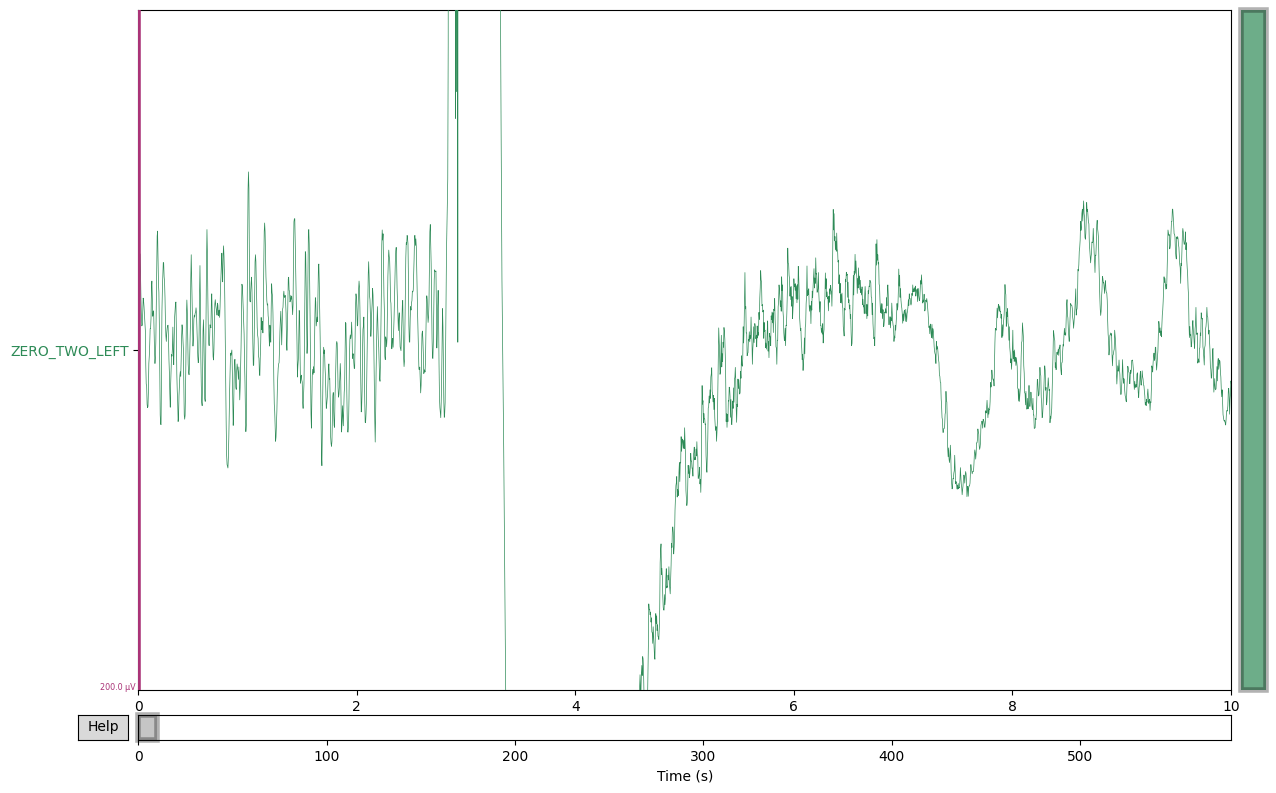

In [13]:
raw = pilot.plot_post_dbs_time_series(
    DBS_duration="5min",
    burstDBS_or_cDBS="cDBS",
    hemisphere="Left"
)

In [14]:
loaded_excel = io.load_excel_files(filename="streaming_dbs_turned_OFF")
loaded_excel

Excel file loaded:  streaming_dbs_turned_OFF.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data


,subject_hemisphere,hemisphere,burstDBS_or_cDBS,DBS_duration,DBS_OFF_sec
0,075_Left,Left,burstDBS,1min,68
1,075_Right,Right,burstDBS,1min,68
2,075_Left,Left,cDBS,1min,68
3,075_Right,Right,cDBS,1min,68
4,075_Left,Left,burstDBS,5min,319
5,075_Right,Right,burstDBS,5min,319
6,075_Left,Left,cDBS,5min,312
7,075_Right,Right,cDBS,5min,312
8,075_Left,Left,burstDBS,30min,264
9,075_Right,Right,burstDBS,30min,264


In [19]:
dbs_OFF = mne.Annotations(onset=[68], duration=[180], description=["post-DBS"])
dbs_OFF

<Annotations | 1 segment: post-DBS (1)>

In [20]:
raw.set_annotations(dbs_OFF)

<RawArray | 1 x 76687 (306.7 s), ~605 kB, data loaded>

## Calculate beta baseline pre-DBS (2min) and post-DBS (2-3min post stim OFF)

In [5]:
dbs_baseline = pilot.calculate_beta_baseline(
    DBS_duration="5min",
    burstDBS_or_cDBS="burstDBS",
    hemisphere="Left",
    filtered="band-pass_5_95",
    pre_or_post="pre",
    freq_average_or_peak="peak"
    
)

In [6]:
dbs_baseline

,power_spectrum,frequencies,freq_band,max_peak_freq,max_peak_power,freq_range_around_max_peak,power_in_freq_range_around_max_peak,power_average_in_freq_range_around_max_peak,power_area_under_curve,power_type,hemisphere,DBS_duration,burstDBS_or_cDBS,filtered,beta_baseline
0,"[0.03622797075111942, 0.016574805454452824, 0....","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",beta,13,9.697175,"[10, 11, 12, 13, 14, 15, 16]","[6.309611534590584, 6.57743933360685, 8.051893...",7.693022,47.344010,average_Zxx,Left,5min,burstDBS,band-pass_5_95,pre
1,"[0.03622797075111942, 0.016574805454452824, 0....","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",low_beta,13,9.697175,"[10, 11, 12, 13, 14, 15, 16]","[6.309611534590584, 6.57743933360685, 8.051893...",7.693022,47.344010,average_Zxx,Left,5min,burstDBS,band-pass_5_95,pre
2,"[0.03622797075111942, 0.016574805454452824, 0....","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",high_beta,22,8.496116,"[19, 20, 21, 22, 23, 24, 25]","[7.569770160195235, 7.518697781427746, 7.16106...",7.213758,44.364901,average_Zxx,Left,5min,burstDBS,band-pass_5_95,pre
3,"[0.00021605793496818243, 9.884953986493404e-05...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",beta,13,0.057832,"[10, 11, 12, 13, 14, 15, 16]","[0.03762953348892562, 0.03922681647173635, 0.0...",0.045880,0.282352,normalized_to_5_95,Left,5min,burstDBS,band-pass_5_95,pre
4,"[0.00021605793496818243, 9.884953986493404e-05...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",low_beta,13,0.057832,"[10, 11, 12, 13, 14, 15, 16]","[0.03762953348892562, 0.03922681647173635, 0.0...",0.045880,0.282352,normalized_to_5_95,Left,5min,burstDBS,band-pass_5_95,pre
5,"[0.00021605793496818243, 9.884953986493404e-05...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",high_beta,22,0.050670,"[19, 20, 21, 22, 23, 24, 25]","[0.04514492186800206, 0.04484033421206564, 0.0...",0.043022,0.264585,normalized_to_5_95,Left,5min,burstDBS,band-pass_5_95,pre
6,"[0.007344963914624108, 0.0033604241537903167, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",beta,13,1.966033,"[10, 11, 12, 13, 14, 15, 16]","[1.279228951443047, 1.3335291365851278, 1.6324...",1.559706,9.598662,normalized_to_40_90,Left,5min,burstDBS,band-pass_5_95,pre
7,"[0.007344963914624108, 0.0033604241537903167, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",low_beta,13,1.966033,"[10, 11, 12, 13, 14, 15, 16]","[1.279228951443047, 1.3335291365851278, 1.6324...",1.559706,9.598662,normalized_to_40_90,Left,5min,burstDBS,band-pass_5_95,pre
8,"[0.007344963914624108, 0.0033604241537903167, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",high_beta,22,1.722527,"[19, 20, 21, 22, 23, 24, 25]","[1.534717167864401, 1.5243626055937656, 1.4518...",1.462538,8.994669,normalized_to_40_90,Left,5min,burstDBS,band-pass_5_95,pre


In [7]:
power_spectra = dbs_baseline.power_spectrum.values[0]
frequencies = dbs_baseline.frequencies.values[0]

In [8]:
peaks = pilot.find_peaks(power_spectra, frequencies)

In [9]:
peaks

,power_spectrum,frequencies,freq_band,max_peak_freq,max_peak_power,freq_range_around_max_peak,power_in_freq_range_around_max_peak,power_average_in_freq_range_around_max_peak,power_area_under_curve
0,"[0.03622797075111942, 0.016574805454452824, 0....","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",beta,13,9.697175,"[10, 11, 12, 13, 14, 15, 16]","[6.309611534590584, 6.57743933360685, 8.051893...",7.693022,47.344010
1,"[0.03622797075111942, 0.016574805454452824, 0....","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",low_beta,13,9.697175,"[10, 11, 12, 13, 14, 15, 16]","[6.309611534590584, 6.57743933360685, 8.051893...",7.693022,47.344010
2,"[0.03622797075111942, 0.016574805454452824, 0....","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",high_beta,22,8.496116,"[19, 20, 21, 22, 23, 24, 25]","[7.569770160195235, 7.518697781427746, 7.16106...",7.213758,44.364901


In [11]:
peaks.freq_range_around_max_peak.values[0][0]

10

### Concatenate dataframes and write pickle file with beta baseline

In [130]:
write_beta_baseline_file = pilot.concatenate_beta_baseline_data(pre_or_post="post")

Excel file loaded:  streaming_dbs_turned_OFF.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data
Excel file loaded:  streaming_dbs_turned_OFF.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data
No peak found in beta range
No peak found in low_beta range
No peak found in high_beta range
Excel file loaded:  streaming_dbs_turned_OFF.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data
Excel file loaded:  streaming_dbs_turned_OFF.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data
No peak found in beta range
No peak found in low_beta range
No peak found in high_beta range
Excel file loaded:  streaming_dbs_turned_OFF.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data
Excel file loaded:  streaming_dbs_turned_OFF.xlsx 
loa

In [132]:
write_beta_baseline_file["beta_baseline_peak"].head()

,power_spectrum,frequencies,freq_band,max_peak_freq,max_peak_power,freq_range_around_max_peak,power_in_freq_range_around_max_peak,power_average_in_freq_range_around_max_peak,power_area_under_curve,power_type,hemisphere,DBS_duration,burstDBS_or_cDBS,filtered,beta_baseline
0,"[0.004702371946065695, 0.0021325007632535782, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",beta,16.0,0.830135,"[13, 14, 15, 16, 17, 18, 19]","[1.137278508293119, 0.81317311448209, 0.811372...",0.763226,4.476651,average_Zxx,Right,1min,cDBS,band-pass_5_95,post
1,"[0.004702371946065695, 0.0021325007632535782, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",low_beta,16.0,0.830135,"[13, 14, 15, 16, 17, 18, 19]","[1.137278508293119, 0.81317311448209, 0.811372...",0.763226,4.476651,average_Zxx,Right,1min,cDBS,band-pass_5_95,post
2,"[0.004702371946065695, 0.0021325007632535782, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",high_beta,23.0,0.624312,"[20, 21, 22, 23, 24, 25, 26]","[0.5601806185707764, 0.5909397552018528, 0.595...",0.523433,3.217270,average_Zxx,Right,1min,cDBS,band-pass_5_95,post
3,"[0.0031421030511125454, 0.0014249270860687653,...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",beta,16.0,0.554692,"[13, 14, 15, 16, 17, 18, 19]","[0.7599242067319466, 0.5433584908642975, 0.542...",0.509984,2.991277,normalized_to_40_90,Right,1min,cDBS,band-pass_5_95,post
4,"[0.0031421030511125454, 0.0014249270860687653,...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",low_beta,16.0,0.554692,"[13, 14, 15, 16, 17, 18, 19]","[0.7599242067319466, 0.5433584908642975, 0.542...",0.509984,2.991277,normalized_to_40_90,Right,1min,cDBS,band-pass_5_95,post


In [20]:
power_spectrum = write_beta_baseline_file.average_Zxx.values[0]
frequencies = write_beta_baseline_file.frequencies.values[0]

In [45]:
frequencies

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125.])

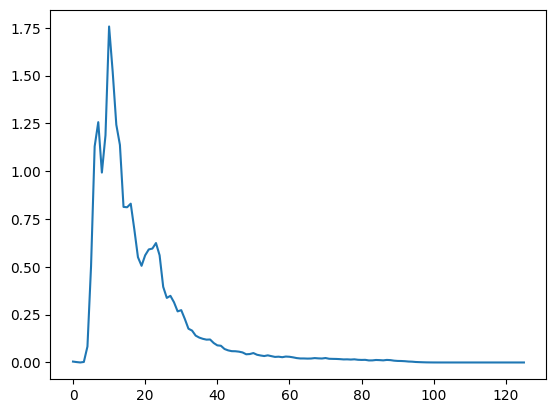

In [21]:
plt.plot(frequencies, power_spectrum)

In [53]:
find_peaks = pilot.find_peaks(power_spectrum=power_spectrum, frequencies=frequencies)

In [54]:
find_peaks

,power_spectrum,frequencies,frequency_range,max_peak_freq,max_peak_power,freq_range_around_max_peak,power_in_freq_range_around_max_peak,power_average_in_freq_range_around_max_peak,power_area_under_curve
0,"[0.004702371946065695, 0.0021325007632535782, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",beta,16,0.830135,"[13, 14, 15, 16, 17, 18, 19]","[1.137278508293119, 0.81317311448209, 0.811372...",0.763226,4.476651
1,"[0.004702371946065695, 0.0021325007632535782, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",low_beta,16,0.830135,"[13, 14, 15, 16, 17, 18, 19]","[1.137278508293119, 0.81317311448209, 0.811372...",0.763226,4.476651
2,"[0.004702371946065695, 0.0021325007632535782, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",high_beta,23,0.624312,"[20, 21, 22, 23, 24, 25, 26]","[0.5601806185707764, 0.5909397552018528, 0.595...",0.523433,3.217270


### Load a single beta average baseline value

In [81]:
loaded_beta_baseline_value = pilot.load_value_beta_baseline(
    DBS_duration="5min",
    burstDBS_or_cDBS="cDBS",
    hemisphere="Left",
    normalized="normalized_to_40_90",
    freq_band="beta",
    filtered="band-pass_5_95",
    freq_average_or_peak="peak",
    pre_or_post="post"
)

In [82]:
loaded_beta_baseline_value

8.913566891998798

### Plot Baseline Power Spectrum

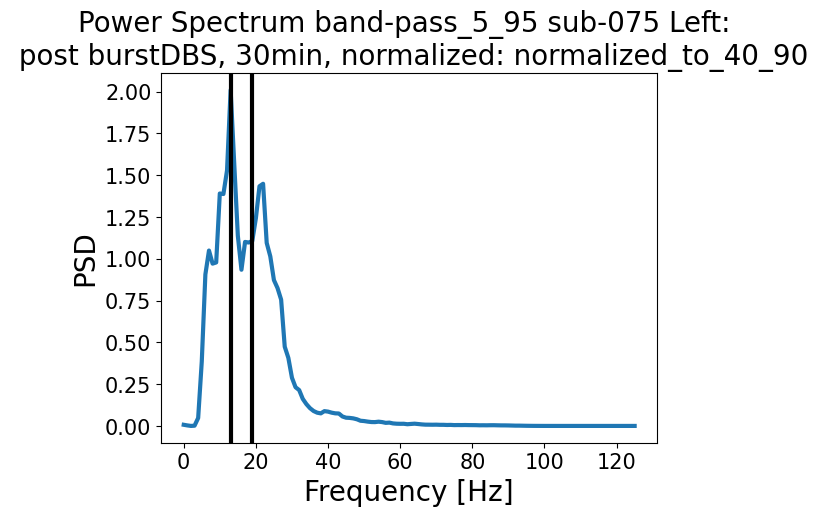

In [26]:
power_spectra = pilot.power_spectrum_baseline(
    DBS_duration="30min",
    burstDBS_or_cDBS="burstDBS",
    hemisphere="Left",
    normalized="normalized_to_40_90",
    freq_band="beta",
    filtered="band-pass_5_95",
    pre_or_post="post"

)

## Calculate relative average beta post-DBS 

In [123]:
calculate_relative_beta = pilot.calculate_rel_power_post_dbs(
    DBS_duration="30min",
    burstDBS_or_cDBS="burstDBS",
    hemisphere="Right",
    normalized="not_normalized",
    freq_band="beta",
    filtered="band-pass_5_95",
    freq_average_or_peak="peak",
)

Excel file loaded:  streaming_dbs_turned_OFF.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data


In [117]:
calculate_relative_beta[0].head()

,hemisphere,DBS_duration,burstDBS_or_cDBS,filtered,freq_band,frequencies,times,Zxx,average_Zxx,std_Zxx,sem_Zxx,power_spectra_half_sec
0,Left,30min,burstDBS,band-pass_5_95,beta,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, ...","[[0.03458954387741961, 0.18727291882342373, 0....","[0.038786144182128585, 0.017852924037360666, 0...","[0.05485030693747569, 0.025203460810037007, 0....","[0.0028948884791617706, 0.0013301877857702855,...","[[0.03458954387741961, 0.013815426288943163, 0..."


In [119]:
calculate_relative_beta[1].head()

,half_sec_psd,seconds_post_DBS_OFF,single_spectrum,freq_band,half_sec_peak,rel_freq_peak_to_pre_DBS,beta_baseline_pre_DBS,rel_freq_peak_to_post_DBS,beta_baseline_post_DBS
0,0,0.5,"[0.03458954387741961, 0.013815426288943163, 0....",beta,267.729396,5.253314,50.963905,5.381699,49.748118
1,1,1.0,"[0.18727291882342373, 0.09330279434293685, 3.8...",beta,91.472885,1.794856,50.963905,1.838721,49.748118
2,2,1.5,"[0.06111350418847979, 0.028511176778586934, 0....",beta,189.172961,3.711901,50.963905,3.802615,49.748118
3,3,2.0,"[0.011287814601411377, 0.00555333273154201, 0....",beta,201.064714,3.945238,50.963905,4.041655,49.748118
4,4,2.5,"[0.0965215545828704, 0.043888044231794196, 0.0...",beta,93.875868,1.842007,50.963905,1.887024,49.748118


In [124]:
rel_beta = calculate_relative_beta[1].rel_freq_peak_to_pre_DBS.values
sec_post_dbs = calculate_relative_beta[1].seconds_post_DBS_OFF.values

In [120]:
rel_beta = calculate_relative_beta[1].rel_freq_average_to_pre_DBS.values
sec_post_dbs = calculate_relative_beta[1].seconds_post_DBS_OFF.values

AttributeError: 'DataFrame' object has no attribute 'rel_freq_average_to_pre_DBS'

In [127]:
rel_beta[0:30]

array([2.46956548, 1.11021758, 1.73309324, 1.44898569, 1.00555654,
       0.92233096, 3.48411394, 1.73734328, 0.85549237, 2.42405679,
       1.61816528, 0.89055677, 1.13717798, 1.51612071, 2.75091909,
       3.01372188, 2.31302953, 3.08888087, 1.53341806, 1.88930422,
       3.38548343, 2.08137654, 2.15268908, 0.90326625, 1.04879542,
       0.72163626, 3.12124825, 1.02792537, 1.74514047, 1.02190685])

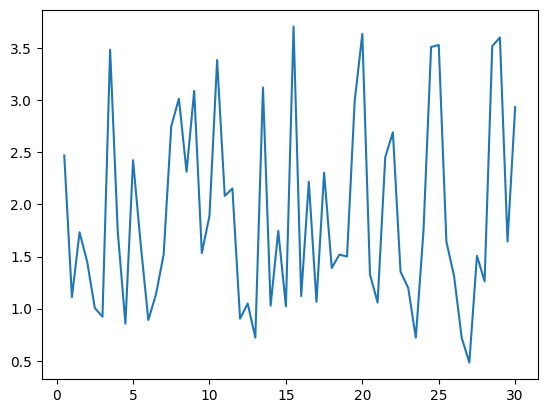

In [129]:
fig = plt.plot(sec_post_dbs[0:60], rel_beta[0:60])

In [14]:
fourier_transform = pilot.fourier_transform(np.array(streaming))

In [15]:
Zxx = fourier_transform[2]

In [16]:
Zxx.shape

(126, 359)

In [27]:
Zxx[2]

array([1.71047668e+01, 1.52285880e+01, 1.84081582e+00, 1.36776543e+00,
       1.50700825e+00, 1.49193326e+00, 1.05686639e+00, 4.83520385e-01,
       4.33605365e-01, 5.27267835e+00, 1.01917745e+00, 3.68925544e+00,
       1.30828353e+01, 4.00048411e+00, 3.85815229e+00, 1.00793866e+00,
       2.55284918e+00, 7.92963752e+00, 1.03295505e+01, 6.31952719e+00,
       1.46489397e+00, 1.93545400e+00, 2.27789957e+00, 1.59942311e+01,
       8.43672949e+00, 4.97362692e+00, 3.55565660e+00, 1.74731535e+00,
       3.40661926e+00, 1.09660533e+00, 5.43058939e+00, 3.34104093e+00,
       4.98216567e-01, 4.91839002e-01, 6.01094547e+00, 9.73758696e-01,
       8.27874242e+00, 2.19493447e+00, 7.39780642e-01, 8.48805609e+00,
       5.19203895e+00, 2.18143544e-01, 6.38072493e+00, 6.97132649e+00,
       1.27913705e+00, 1.87364389e+00, 5.94184375e+00, 1.01010597e+01,
       2.18587119e+00, 2.66107727e+00, 2.08282150e+00, 6.63049790e+00,
       1.00611307e-01, 3.26230445e-01, 2.17670433e-01, 9.76569268e-01,
      

In [25]:
Zxx_1

array([3.01234605e-01, 1.99552709e+01, 1.71047668e+01, 3.00795478e+00,
       1.06132055e+00, 7.56065452e-01, 2.76925935e-01, 1.32013115e+00,
       1.67025901e+00, 2.36763050e+00, 3.40784989e+00, 7.37983199e+00,
       1.14842539e+01, 6.75084047e+00, 2.32403966e-01, 5.18528517e+00,
       1.44337718e-01, 1.32056937e+01, 2.27488984e+01, 3.06740878e+01,
       2.13500689e+01, 6.92468756e+00, 2.04247145e+01, 2.05274856e+01,
       1.69546858e+01, 2.35872896e+00, 4.71573803e-01, 1.36155760e+00,
       1.67531003e+00, 2.11156510e+00, 1.33104479e+00, 2.40521745e+00,
       1.50541898e-01, 9.60059820e-02, 1.75258824e-01, 1.50779410e-01,
       6.60930185e-02, 3.33603814e-01, 9.83602215e-01, 1.14500221e+00,
       6.76532613e-01, 3.20273158e-01, 3.75718030e-01, 4.67278238e-01,
       3.39007233e-02, 1.09988604e-02, 2.96573535e-01, 1.37730945e-01,
       2.53120005e-01, 3.25119053e-01, 6.63496411e-02, 1.33984157e-01,
       3.75697869e-02, 1.20245621e-01, 2.18837258e-01, 1.79415719e-01,
      

In [37]:
transposed = np.transpose(Zxx)

In [40]:
len(transposed)

359

In [42]:
for idx in np.arange(0,5,1):
    print(idx)

0
1
2
3
4


In [36]:
plt.plot(fourier_transform[0], Zxx_1)